# Crop Chesapeake Bay

This notebook opens each of the downloaded files, crops to the shape of the Chesapeake Bay only (without the Delaware Bay), and re-saves the file.

Needs to be run for:
- MUR
- OSTIA

In [1]:
from pathlib import Path
import json

import xarray as xr
import rioxarray
import shapely
import geopandas as gpd

### Open Dataset

In [5]:
dataset_name = {
    'Geo-Polar': [
        'L4_GHRSST-SSTfnd-Geo_Polar_Blended_Night-GLOB-v02.0-fv01.0_CB_20020901_20231231.nc',
        'L4_GHRSST-SSTfnd-Geo_Polar_Blended_Night-GLOB-v02.0-fv01.0_CB_20020901_20231231.nc'
    ],
    'MUR': [
        'MUR-JPL-L4_GHRSST-SSTfnd-GLOB-v02.0-fv04.1-20030101_20231231.nc',
        'MUR-JPL-L4_GHRSST-SSTfnd-GLOB-v02.0-fv04.1-20030101_20231231.nc'
    ],
    'OSTIA': [
        'METOFFICE-GLO-SST-L4-NRT-OBS-SST-V2_analysed_sst_77.47W-75.53W_36.78N-39.97N_2007-01-01-2023-12-31.nc',
        'METOFFICE-GLO-SST-L4-NRT-OBS-SST-V2_analysed_sst_77.47W-75.53W_36.78N-39.97N_2007-01-01-2023-12-31.nc'
    ]
}
        

In [6]:
datapath = Path('/Users/rwegener/repos/chesapeake_mhw/data/02_interim') / \
    dataset_name['MUR'][0]

In [7]:
# open file
ds = xr.open_dataset(datapath)
# assign valid crs
ds.rio.write_crs("epsg:4326", inplace=True)

<xarray.Dataset>
Dimensions:       (time: 7667, lat: 326, lon: 201)
Coordinates:
  * time          (time) datetime64[ns] 2003-01-01T09:00:00 ... 2023-12-31T09...
  * lat           (lat) float32 36.75 36.76 36.77 36.78 ... 39.98 39.99 40.0
  * lon           (lon) float32 -77.5 -77.49 -77.48 ... -75.52 -75.51 -75.5
    spatial_ref   int64 0
Data variables:
    analysed_sst  (time, lat, lon) float32 ...

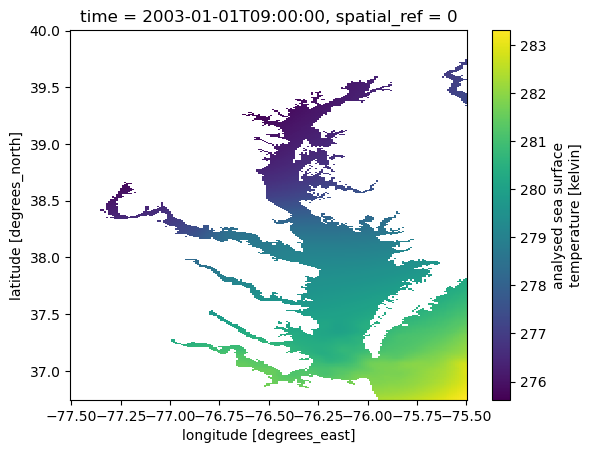

In [8]:
ds.analysed_sst.isel(time=0).plot()

### Create geometry object used to crop

In [9]:
cbay_wkt = (
    'POLYGON ((-75.07331635657022 36.69945277755481,' 
    '-75.07331761665449 38.10656782772858, -75.37020665599995 38.29321651673962,'  
    '-75.7561692781297 39.85271304991599, -77.9036114835175 39.860284284356595,'
    '-77.9432159124284 36.7312001366339, -75.07331635657022 36.69945277755481))'
)

In [10]:
cbay_gdf = gpd.GeoDataFrame(geometry=gpd.GeoSeries.from_wkt([cbay_wkt]), 
                            crs='EPSG:4326')

### Crop the dataset

In [11]:
clipped = ds.rio.clip(cbay_gdf.geometry.values, cbay_gdf.crs, drop=False)

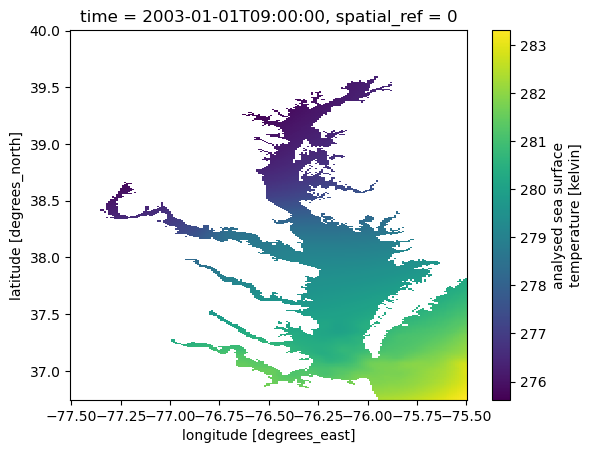

In [12]:
clipped.analysed_sst.isel(time=0).plot()

### Save

In [13]:
clipped.to_netcdf(Path('/Users/rwegener/repos/chesapeake_mhw/data/01_raw') / \
    dataset_name['MUR'][1])

### Notes

As far as I can tell this formatting mirrors the docs exactly.

https://corteva.github.io/rioxarray/html/examples/clip_geom.html#Clip-using-a-geometry

Why doesn't it work? Github ticket or PR?

In [11]:
cbay_shape = [
    {
        'type': 'Polygon',
        'coordinates': [[
            [-75.07331635657022, 36.69945277755481],
            [-75.07331761665449, 38.10656782772858],
            [-75.37020665599995, 38.29321651673962],
            [-75.7561692781297, 39.85271304991599],
            [-77.9036114835175, 39.860284284356595],
            [-77.9432159124284, 36.7312001366339],
            [-75.07331635657022, 36.69945277755481]
        ]]
    }
]

## Scratch

In [11]:
ds = xr.open_dataset('/Users/rwegener/repos/chesapeake_mhw/data/01_raw/L4_GHRSST-SSTfnd-Geo_Polar_Blended_Night-GLOB-v02.0-fv01.0_CB_20030101_20231231.nc')

In [13]:
import pandas as pd

In [14]:
pd.date_range('2003-01-01', '2023-12-31')

DatetimeIndex(['2003-01-01', '2003-01-02', '2003-01-03', '2003-01-04',
               '2003-01-05', '2003-01-06', '2003-01-07', '2003-01-08',
               '2003-01-09', '2003-01-10',
               ...
               '2023-12-22', '2023-12-23', '2023-12-24', '2023-12-25',
               '2023-12-26', '2023-12-27', '2023-12-28', '2023-12-29',
               '2023-12-30', '2023-12-31'],
              dtype='datetime64[ns]', length=7670, freq='D')

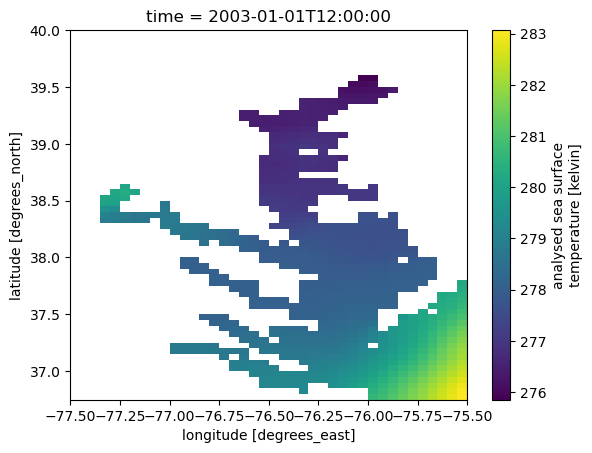

In [16]:
ds.analysed_sst.isel(time=0).plot()